# Kudzu Algorithms

This notebook sets up the workflow for comparing classical and quantum machine learning. It starts with basic visualization along with a baseline logistic regression model. After that, a Support vector machine algorithm is used to demonstrate the complex decision boudnary between the groups of data.

For the quantum algorithm portion, the code demonstrates an example model on a quantum computer as well as a real dataset on a quantum simulator.




In [ ]:
TOKEN = ''

## Data viz

In [1]:
import pandas as pd
import seaborn as sns

kudzu = pd.read_csv('/content/drive/Shareddrives/UG_Connor_Lewis/Codes/combinedSpeciesData_PresAndNonPres_Weather.csv')
kudzu.drop(columns=['Unnamed: 0'], inplace=True)
kudzu

,presence,stateProvince,countryCode,invasiveStatus,Average Precip(Inches),Average Temperature(F),Average Max Temp(F),Average Min Temp(F),decimalLongitude,decimalLatitude
0,1,Tennessee,US,Invasive,4.557500,60.426667,71.567500,49.279167,-85.350200,35.014200
1,1,North Carolina,US,Invasive,4.475833,56.195000,68.660000,43.723333,-83.245900,35.372900
2,1,North Carolina,US,Invasive,4.697500,55.024167,66.979167,43.061667,-83.245900,35.372900
3,1,North Carolina,US,Invasive,4.062500,57.304167,68.642500,45.953333,-80.479200,36.400000
4,1,Tennessee,US,Invasive,4.560000,60.417500,71.482500,49.345833,-85.313700,35.089900
...,...,...,...,...,...,...,...,...,...,...
10613,0,NaN,US,Invasive,3.858333,64.689167,76.478333,52.889167,-82.962412,32.992749
10614,0,NaN,US,Invasive,3.859167,64.641667,76.450833,52.820833,-82.962412,32.992749
10615,0,NaN,US,Invasive,4.181667,62.648333,74.245833,51.038333,-84.181563,33.120886
10616,0,NaN,US,Invasive,4.181667,62.624167,74.149167,51.091667,-84.181563,33.120886


In [21]:
print(kudzu.columns)

Index(['presence', 'stateProvince', 'countryCode', 'invasiveStatus',
       'Average Precip(Inches)', 'Average Temperature(F)',
       'Average Max Temp(F)', 'Average Min Temp(F)', 'decimalLongitude',
       'decimalLatitude'],
      dtype='object')


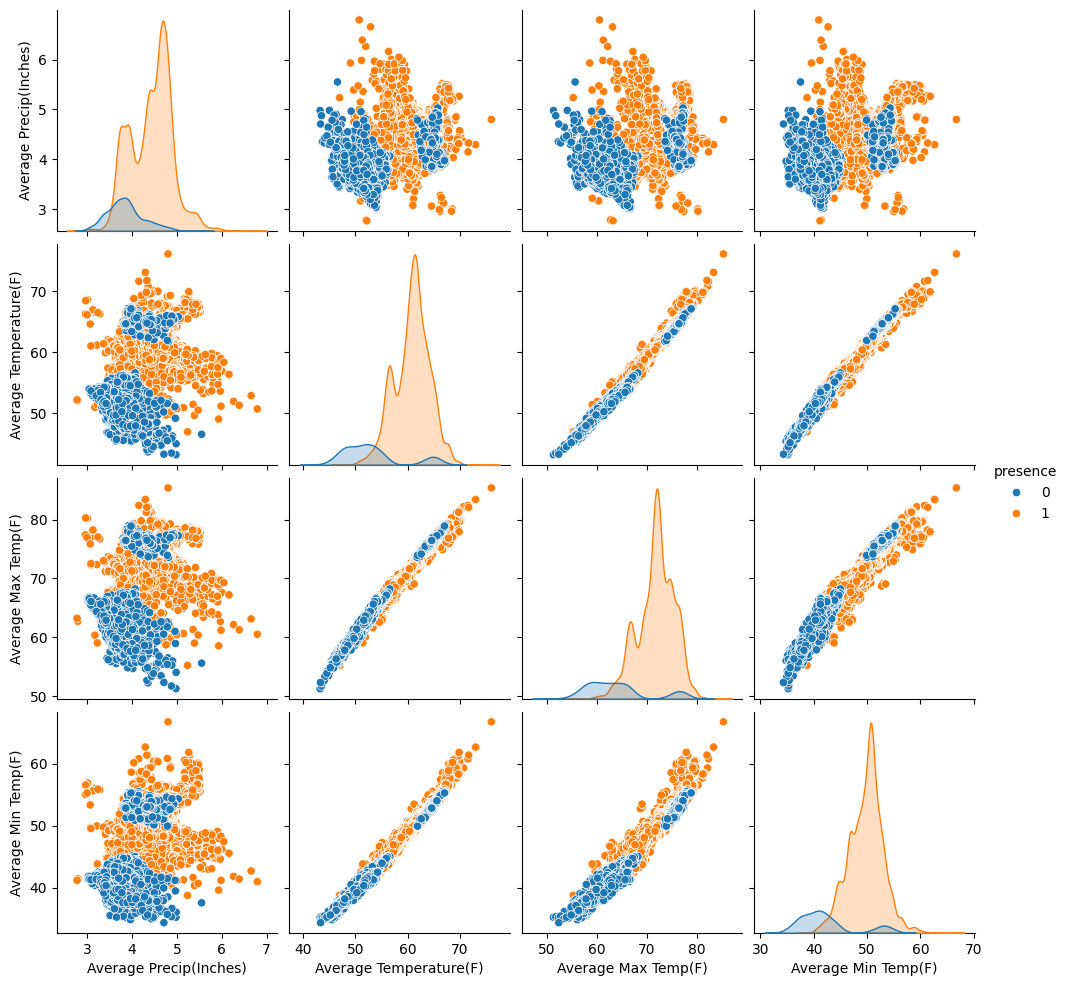

In [2]:
import seaborn as sns
kudzu_viz = kudzu.drop(columns = ['decimalLongitude', 'decimalLatitude'])
sns.pairplot(kudzu_viz, hue="presence", palette="tab10")

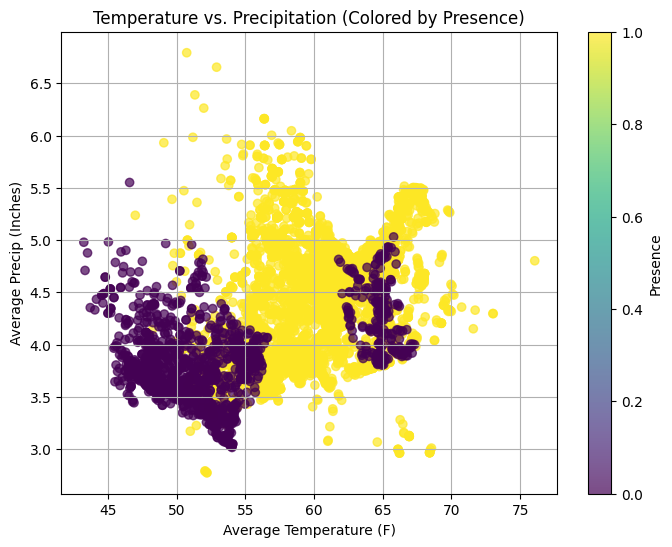

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    kudzu_viz['Average Temperature(F)'],
    kudzu_viz['Average Precip(Inches)'],
    c=kudzu_viz['presence'],  # Color by presence
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Average Temperature (F)')
plt.ylabel('Average Precip (Inches)')
plt.title('Temperature vs. Precipitation (Colored by Presence)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Presence')

plt.grid(True)
plt.show()


Not linearly separable on these two features

## Show miniexample on two features then expand to larger svc shown in project
Just want to remake my visuals so theyre here

In [4]:
data = kudzu[['Average Temperature(F)', 'Average Precip(Inches)', 'presence']]
data

,Average Temperature(F),Average Precip(Inches),presence
0,60.426667,4.557500,1
1,56.195000,4.475833,1
2,55.024167,4.697500,1
3,57.304167,4.062500,1
4,60.417500,4.560000,1
...,...,...,...
10613,64.689167,3.858333,0
10614,64.641667,3.859167,0
10615,62.648333,4.181667,0
10616,62.624167,4.181667,0


In [9]:
print(data.groupby('presence').size())

presence
0    1452
1    9166
dtype: int64


### Logistic Baseline

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

X = data[['Average Temperature(F)', 'Average Precip(Inches)']]
y = data['presence']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation AUC-ROC: {val_auc_roc:.4f}')

# Evaluate on test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred_proba)

print(f'Deployment Accuracy: {accuracy:.4f}')
print(f'Deployment Precision: {precision:.4f}')
print(f'Deployment Recall: {recall:.4f}')
print(f'Deployment AUC-ROC: {auc_roc:.4f}')


Validation Accuracy: 0.8167
Validation Precision: 0.9712
Validation Recall: 0.8111
Validation AUC-ROC: 0.8897
Deployment Accuracy: 0.8261
Deployment Precision: 0.9805
Deployment Recall: 0.8201
Deployment AUC-ROC: 0.8989


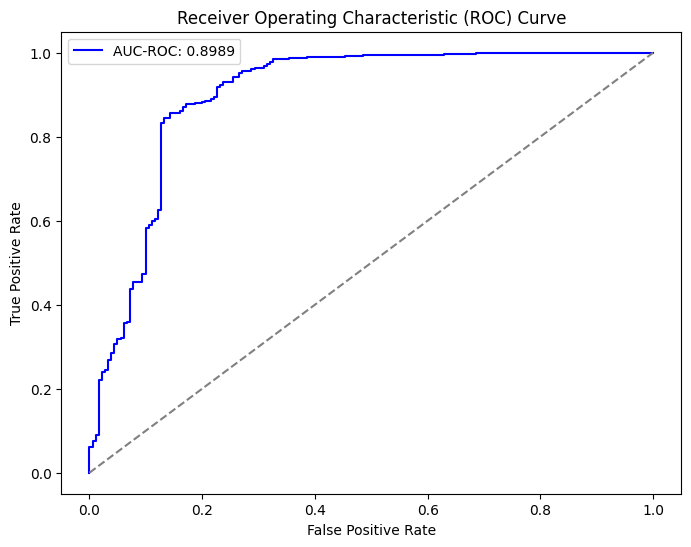

In [17]:
import matplotlib.pyplot as plt
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC: {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### SVM

Kernel: linear
Validation Accuracy: 0.8525
Validation Precision: 0.9725
Validation Recall: 0.8527
Validation AUC-ROC: 0.8791
----------------------------------------
Kernel: poly
Validation Accuracy: 0.9429
Validation Precision: 0.9598
Validation Recall: 0.9745
Validation AUC-ROC: 0.8990
----------------------------------------
Kernel: rbf
Validation Accuracy: 0.9266
Validation Precision: 0.9868
Validation Recall: 0.9271
Validation AUC-ROC: 0.9658
----------------------------------------
Kernel: sigmoid
Validation Accuracy: 0.6001
Validation Precision: 0.9087
Validation Recall: 0.5952
Validation AUC-ROC: 0.5851
----------------------------------------
Best Kernel: rbf
Test Accuracy: 0.9140
Test Precision: 0.9908
Test Recall: 0.9115
Test AUC-ROC: 0.9604


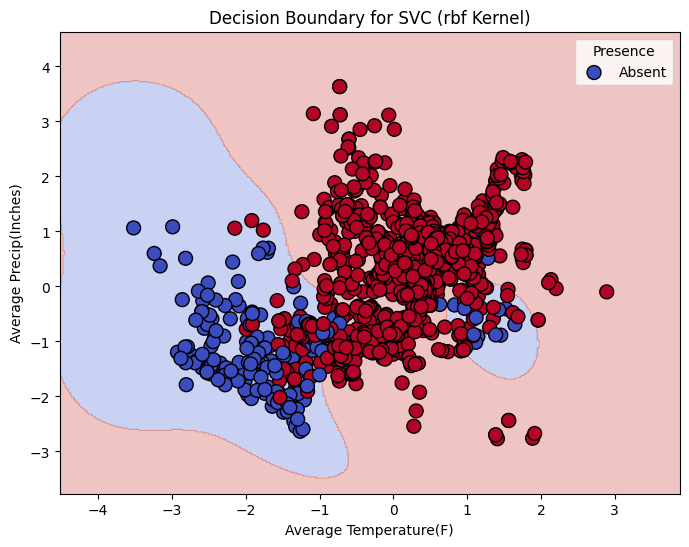

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is already loaded
X = data[['Average Temperature(F)', 'Average Precip(Inches)']]
y = data['presence']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Try different kernel methods for SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, class_weight='balanced', probability=True)
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)

    results[kernel] = {
        'Validation Accuracy': val_accuracy,
        'Validation Precision': val_precision,
        'Validation Recall': val_recall,
        'Validation AUC-ROC': val_auc_roc
    }

    print(f'Kernel: {kernel}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation AUC-ROC: {val_auc_roc:.4f}')
    print('-' * 40)

# Select best kernel based on AUC-ROC
best_kernel = max(results, key=lambda k: results[k]['Validation AUC-ROC'])
print(f'Best Kernel: {best_kernel}')

# Train and evaluate the best SVC model on test set
best_model = SVC(kernel=best_kernel, class_weight='balanced', probability=True)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred_proba)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC-ROC: {auc_roc:.4f}')

# Decision Boundary Plot
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
    plt.xlabel('Average Temperature(F)')
    plt.ylabel('Average Precip(Inches)')
    plt.title(f'Decision Boundary for SVC ({best_kernel} Kernel)')
    plt.legend(title='Presence', loc='upper right', labels=['Absent', 'Present'])
    plt.show()

plot_decision_boundary(best_model, X_test, y_test)


## Full approach

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

data = kudzu[['Average Precip(Inches)', 'Average Temperature(F)',
       'Average Max Temp(F)', 'Average Min Temp(F)', 'presence']]

X = data[['Average Precip(Inches)', 'Average Temperature(F)',
       'Average Max Temp(F)', 'Average Min Temp(F)']]
y = data['presence']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation AUC-ROC: {val_auc_roc:.4f}')

# Evaluate on test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred_proba)

print(f'Deployment Accuracy: {accuracy:.4f}')
print(f'Deployment Precision: {precision:.4f}')
print(f'Deployment Recall: {recall:.4f}')
print(f'Deployment AUC-ROC: {auc_roc:.4f}')


Validation Accuracy: 0.8324
Validation Precision: 0.9686
Validation Recall: 0.8322
Validation AUC-ROC: 0.9027
Deployment Accuracy: 0.8223
Deployment Precision: 0.9804
Deployment Recall: 0.8159
Deployment AUC-ROC: 0.9026


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

X = data[['Average Precip(Inches)', 'Average Temperature(F)',
       'Average Max Temp(F)', 'Average Min Temp(F)']]
y = data['presence']


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Try different kernel methods for SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, class_weight='balanced', probability=True)
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)

    results[kernel] = {
        'Validation Accuracy': val_accuracy,
        'Validation Precision': val_precision,
        'Validation Recall': val_recall,
        'Validation AUC-ROC': val_auc_roc
    }

    print(f'Kernel: {kernel}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation AUC-ROC: {val_auc_roc:.4f}')
    print('-' * 40)

# Select best kernel based on AUC-ROC
best_kernel = max(results, key=lambda k: results[k]['Validation AUC-ROC'])
print(f'Best Kernel: {best_kernel}')

# Train and evaluate the best SVC model on test set
best_model = SVC(kernel=best_kernel, class_weight='balanced', probability=True)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred_proba)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC-ROC: {auc_roc:.4f}')

Kernel: linear
Validation Accuracy: 0.8895
Validation Precision: 0.9738
Validation Recall: 0.8957
Validation AUC-ROC: 0.8914
----------------------------------------
Kernel: poly
Validation Accuracy: 0.9410
Validation Precision: 0.9733
Validation Recall: 0.9577
Validation AUC-ROC: 0.9118
----------------------------------------
Kernel: rbf
Validation Accuracy: 0.9259
Validation Precision: 0.9898
Validation Recall: 0.9234
Validation AUC-ROC: 0.9743
----------------------------------------
Kernel: sigmoid
Validation Accuracy: 0.5782
Validation Precision: 0.9059
Validation Recall: 0.5689
Validation AUC-ROC: 0.6020
----------------------------------------
Best Kernel: rbf
Test Accuracy: 0.9171
Test Precision: 0.9908
Test Recall: 0.9150
Test AUC-ROC: 0.9654


## Quantum Algorithm on simulator
Show how this process could be applied to the kudzu dataset because the kudzu dataset can be modeled with the SVC. From this example: https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html

In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/Shareddrives/UG_Connor_Lewis/Codes/combinedSpeciesData_PresAndNonPres_Weather.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

labels = data[['presence']]
features = data[['Average Precip(Inches)', 'Average Temperature(F)']]
labels = labels.to_numpy()
features = features.to_numpy()

In [2]:
from sklearn.preprocessing import MinMaxScaler
# Maps data to [0,1]
features = MinMaxScaler().fit_transform(features)
features

array([[0.44391458, 0.52352523],
       [0.42359527, 0.39451756],
       [0.47874767, 0.35882323],
       ...,
       [0.35040431, 0.59125553],
       [0.35040431, 0.59051877],
       [0.29919137, 0.72646207]])

In [5]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f7bb6161db7c2f2437445695b9920997621b9fb5bff9a7e360b402a8005ab039
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


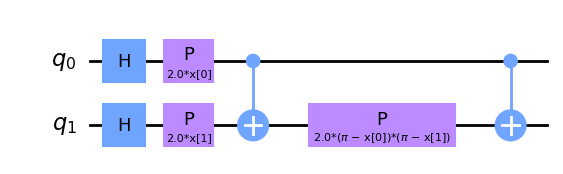

In [6]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

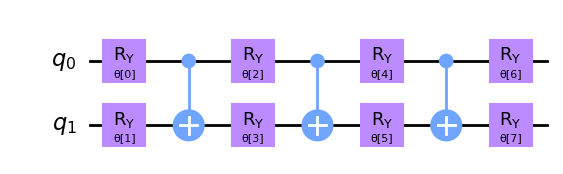

In [7]:
# x[0] x[1] represent the features
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [8]:
from qiskit_machine_learning.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [9]:
# Sampler or real quantum computer
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()

In [10]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals
from sklearn.svm import SVC


algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

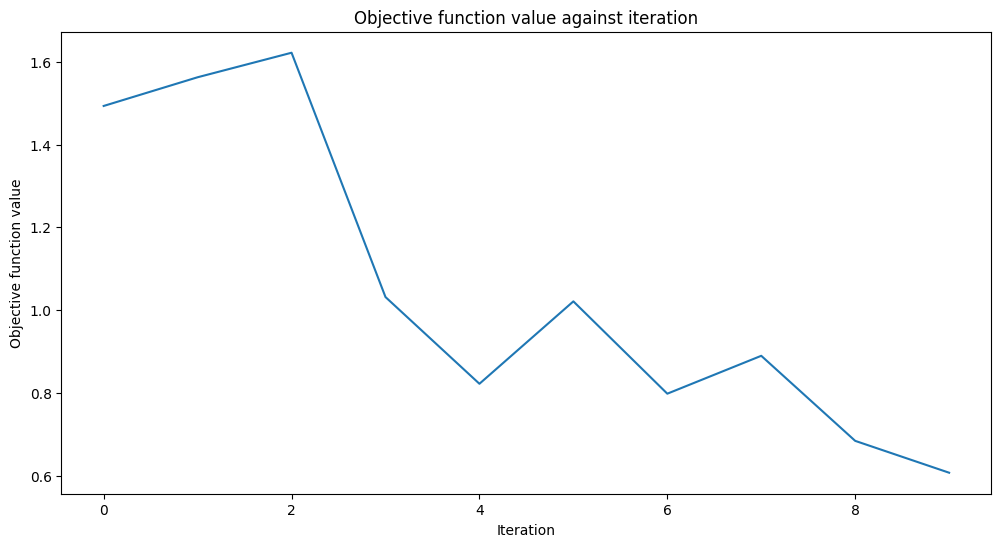

Training time: 1228 seconds


In [12]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.circuit.library import EfficientSU2
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

ansatz = EfficientSU2(num_qubits=num_features, reps=2)
optimizer = COBYLA(maxiter=10)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features_balanced, train_labels_balanced)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [13]:
from sklearn.metrics import recall_score, precision_score

# Predict labels
train_preds = vqc.predict(train_features)
test_preds = vqc.predict(test_features)

# Compute recall and precision
train_recall = recall_score(train_labels, train_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')

train_precision = precision_score(train_labels, train_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted')

# Print results
print(f"Quantum VQC Recall on training set:  {train_recall:.2f}")
print(f"Quantum VQC Recall on test set:      {test_recall:.2f}")
print(f"Quantum VQC Precision on training set: {train_precision:.2f}")
print(f"Quantum VQC Precision on test set:     {test_precision:.2f}")


Quantum VQC Recall on training set:  0.85
Quantum VQC Recall on test set:      0.86
Quantum VQC Precision on training set: 0.89
Quantum VQC Precision on test set:     0.90


## Sample using vqc on fake data on real quantum computer

In [5]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit-machine-learning
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.2
    Uninstalling pydantic_core-2.27.2:
      Successfully uninstalled pydantic_core-2.27.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6


In [8]:
from qiskit import QuantumCircuit
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np

# Load IBM Runtime service
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)
backend = service.least_busy(simulator=False, operational=True)

# Create a sampler instance
sampler = SamplerV2(backend)


In [16]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes, PauliFeatureMap
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np

# Define number of qubits
num_qubits = 2

# Define number of qubits
num_qubits = 2

# Define a proper feature map and ansatz
feature_map = PauliFeatureMap(num_qubits, paulis=['Z', 'ZZ'])
ansatz = RealAmplitudes(num_qubits, reps=1)

# Define optimizer
optimizer = COBYLA(maxiter=100)

# Define the classifier
vqc = VQC(
    num_qubits=num_qubits,
    feature_map=feature_map,
    ansatz=ansatz,
    loss='cross_entropy',
    optimizer=optimizer,
    sampler=sampler
)

# Generate training data
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])  # XOR problem

# Train the model
vqc.fit(X_train, y_train)

# Make predictions
X_test = np.array([[0, 0], [1, 1]])
y_pred = vqc.predict(X_test)

print("Predictions:", y_pred)

IBMInputValueError: 'The instruction PauliFeatureMap on qubits (0, 1) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'

## VQC small sample on real quantum computer

In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/content/drive/Shareddrives/UG_Connor_Lewis/Codes/combinedSpeciesData_PresAndNonPres_Weather.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

labels = data[['presence']]
features = data[['Average Precip(Inches)', 'Average Temperature(F)']]
labels = labels.to_numpy()
features = features.to_numpy()

# Maps data to [0,1]
features = MinMaxScaler().fit_transform(features)

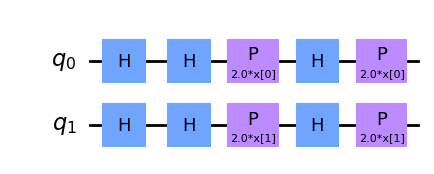

In [97]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import PauliFeatureMap


num_features = features.shape[1]

# feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map = PauliFeatureMap(feature_dimension=num_features, reps=1, paulis=['X', 'Z'])

feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

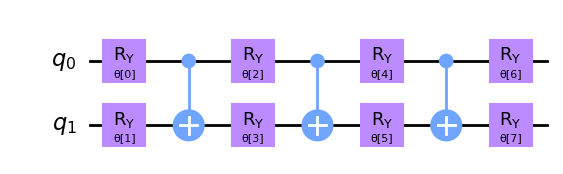

In [98]:
# x[0] x[1] represent the features
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [99]:
# !pip install qiskit-ibm-runtime

In [100]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

backend = service.least_busy(simulator=False, operational=True)

print(backend)

<IBMBackend('ibm_sherbrooke')>


In [101]:
from qiskit_ibm_runtime import SamplerV2

ibm_qcomp = service.backend('ibm_kyiv')

# Submit the job using SamplerV2
sampler = SamplerV2(ibm_qcomp)

In [102]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [103]:
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals
from sklearn.svm import SVC


algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [104]:
print(f"Basis gates: {backend.configuration().basis_gates}")
print(f"Coupling map: {backend.configuration().coupling_map}")

Basis gates: ['ecr', 'id', 'rz', 'sx', 'x']
Coupling map: [[1, 0], [1, 2], [3, 2], [4, 3], [4, 15], [5, 4], [6, 5], [7, 6], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [12, 13], [14, 0], [14, 18], [16, 8], [17, 12], [17, 30], [18, 19], [19, 20], [20, 33], [21, 20], [21, 22], [22, 15], [23, 22], [23, 24], [25, 24], [26, 16], [26, 25], [26, 27], [28, 27], [29, 28], [29, 30], [31, 30], [31, 32], [32, 36], [33, 39], [34, 24], [35, 28], [35, 47], [36, 51], [37, 38], [38, 39], [40, 39], [41, 40], [41, 53], [42, 41], [43, 34], [43, 42], [43, 44], [45, 44], [45, 46], [47, 46], [47, 48], [49, 48], [49, 50], [50, 51], [52, 37], [53, 60], [54, 45], [55, 49], [56, 52], [56, 57], [57, 58], [59, 58], [59, 60], [61, 60], [61, 62], [63, 62], [63, 64], [64, 54], [64, 65], [66, 65], [67, 66], [68, 55], [68, 67], [69, 68], [69, 70], [71, 58], [71, 77], [72, 62], [73, 66], [73, 85], [74, 70], [75, 76], [77, 76], [78, 77], [78, 79], [79, 91], [80, 79], [80, 81], [81, 72], [81, 82], [82, 83], [83, 84], [85

In [105]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.circuit.library import EfficientSU2
from imblearn.over_sampling import SMOTE
from qiskit import transpile
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

ansatz = EfficientSU2(num_qubits=num_features, reps=2)
optimizer = COBYLA(maxiter=10)

# Use the transpiled circuits
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features_balanced, train_labels_balanced)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

TranspilerError: 'Invalid plugin name ibm_dynamic_circuits for stage translation'

In [ ]:
from sklearn.metrics import recall_score, precision_score

# Predict labels
train_preds = vqc.predict(train_features)
test_preds = vqc.predict(test_features)

# Compute recall and precision
train_recall = recall_score(train_labels, train_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')

train_precision = precision_score(train_labels, train_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted')

# Print results
print(f"Quantum VQC Recall on training set:  {train_recall:.2f}")
print(f"Quantum VQC Recall on test set:      {test_recall:.2f}")
print(f"Quantum VQC Precision on training set: {train_precision:.2f}")
print(f"Quantum VQC Precision on test set:     {test_precision:.2f}")
